In [1]:
import glob
import os
import pandas as pd
from io import StringIO
from matplotlib import pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')
import numpy as np

%matplotlib inline
%load_ext autoreload
%autoreload 2

### RNA-seq short-read sequencing data

In [2]:
dataset = '/cluster/work/grlab/projects/metagenome/benchmark_kingsford/data_fasta/SRR*.fasta.gz'

In [3]:
files = glob.glob(dataset)
files[:10]

['/cluster/work/grlab/projects/metagenome/benchmark_kingsford/data_fasta/SRR1035700.fasta.gz',
 '/cluster/work/grlab/projects/metagenome/benchmark_kingsford/data_fasta/SRR654041.fasta.gz',
 '/cluster/work/grlab/projects/metagenome/benchmark_kingsford/data_fasta/SRR191536.fasta.gz',
 '/cluster/work/grlab/projects/metagenome/benchmark_kingsford/data_fasta/SRR343348.fasta.gz',
 '/cluster/work/grlab/projects/metagenome/benchmark_kingsford/data_fasta/SRR805884.fasta.gz',
 '/cluster/work/grlab/projects/metagenome/benchmark_kingsford/data_fasta/SRR403016.fasta.gz',
 '/cluster/work/grlab/projects/metagenome/benchmark_kingsford/data_fasta/SRR846956.fasta.gz',
 '/cluster/work/grlab/projects/metagenome/benchmark_kingsford/data_fasta/SRR1002075.fasta.gz',
 '/cluster/work/grlab/projects/metagenome/benchmark_kingsford/data_fasta/SRR567154.fasta.gz',
 '/cluster/work/grlab/projects/metagenome/benchmark_kingsford/data_fasta/SRR1066641.fasta.gz']

In [4]:
print('Files in the dataset: {}'.format(len(files)))
print('Size of the dataset: {:.2f} Gib'.format(sum([os.path.getsize(x) for x in files]) / 2**30))

Files in the dataset: 2652
Size of the dataset: 2948.94 Gib


In [5]:
data_size = pd.Series(data=[os.path.getsize(x) / 2**30 for x in files], index=[x.split('/')[-1][:-len('.fasta.gz')] for x in files])
data_size.head()

SRR1035700    1.269203
SRR654041     0.349531
SRR191536     0.000381
SRR343348     0.112754
SRR805884     2.364810
dtype: float64

In [6]:
annotation = '/cluster/home/mikhaika/big_graph/graph_SRR_k20_2/annotation/*.color.annodbg'
anno_files = glob.glob(annotation)
anno_files[:10]

['/cluster/home/mikhaika/big_graph/graph_SRR_k20_2/annotation/SRR101424.color.annodbg',
 '/cluster/home/mikhaika/big_graph/graph_SRR_k20_2/annotation/SRR1047839.color.annodbg',
 '/cluster/home/mikhaika/big_graph/graph_SRR_k20_2/annotation/SRR543516.color.annodbg',
 '/cluster/home/mikhaika/big_graph/graph_SRR_k20_2/annotation/SRR066463.color.annodbg',
 '/cluster/home/mikhaika/big_graph/graph_SRR_k20_2/annotation/SRR306839.color.annodbg',
 '/cluster/home/mikhaika/big_graph/graph_SRR_k20_2/annotation/SRR448330.color.annodbg',
 '/cluster/home/mikhaika/big_graph/graph_SRR_k20_2/annotation/SRR353645.color.annodbg',
 '/cluster/home/mikhaika/big_graph/graph_SRR_k20_2/annotation/SRR934636.color.annodbg',
 '/cluster/home/mikhaika/big_graph/graph_SRR_k20_2/annotation/SRR343345.color.annodbg',
 '/cluster/home/mikhaika/big_graph/graph_SRR_k20_2/annotation/SRR567136.color.annodbg']

In [7]:
print('Size of annotation: {:.2f} Gib'.format(sum([os.path.getsize(x) for x in anno_files]) / 2**30))

Size of annotation: 24.40 Gib


In [8]:
column_size = pd.Series(data=[os.path.getsize(x) / 2**30 for x in anno_files], index=[x.split('/')[-1][:-len('.color.annodbg')] for x in anno_files])
column_size.head()

SRR101424     0.002247
SRR1047839    0.007285
SRR543516     0.003775
SRR066463     0.004361
SRR306839     0.009361
dtype: float64

In [9]:
stats = pd.DataFrame(data_size, columns=['ComprData'])
stats['Annotation'] = column_size
stats.head()

,ComprData,Annotation
SRR1035700,1.269203,1.385124e-02
SRR654041,0.349531,3.799959e-03
SRR191536,0.000381,2.695192e-04
SRR343348,0.112754,2.235174e-08
SRR805884,2.364810,1.031428e-02


In [10]:
!./metagraph/build/metagengraph stats -a /cluster/work/grlab/projects/metagenome/benchmark_kingsford_results/graph_SRR_k20_2/merged_annotation.color.annodbg

Statistics for annotation /cluster/work/grlab/projects/metagenome/benchmark_kingsford_results/graph_SRR_k20_2/merged_annotation.color.annodbg
colors: 2586
sparsity: 9.987877e-01


In [11]:
%%bash --out output --err error

./metagraph/build/metagengraph stats -v -a /cluster/work/grlab/projects/metagenome/benchmark_kingsford_results/graph_SRR_k20_2/merged_annotation.color.annodbg

In [12]:
print(error)

In [13]:
string_io = StringIO('\n'.join(output.split('\n')[5:-95]))
annotation_stats = pd.read_csv(string_io, delimiter=' ', header=None, usecols=[1, 3, 6], names=['File', 'Density', 'SetBits'])
annotation_stats['Density'] = annotation_stats['Density'].apply(lambda x: float(x[:-1]) if x.endswith(',') else float(x))
annotation_stats['Initial_order'] = np.arange(annotation_stats.shape[0])
annotation_stats.tail()

,File,Density,SetBits,Initial_order
2491,</cluster/work/grlab/projects/metagenome/bench...,0.001391,9228046,2491
2492,</cluster/work/grlab/projects/metagenome/bench...,0.000991,6578182,2492
2493,</cluster/work/grlab/projects/metagenome/bench...,0.001231,8171982,2493
2494,</cluster/work/grlab/projects/metagenome/bench...,0.001140,7564160,2494
2495,</cluster/work/grlab/projects/metagenome/bench...,0.001186,7873371,2495


In [14]:
annotation_stats.index = annotation_stats['File'].apply(lambda x: x.split('/')[-1].split('.')[0])
del annotation_stats['File']
annotation_stats.head()

,Density,SetBits,Initial_order
File,,,
SRR014494,0.000144,958367,0
SRR014495,0.000156,1032433,1
SRR029131,0.000153,1012116,2
SRR032273,0.001222,8107049,3
SRR032276,0.001227,8139884,4


In [15]:
stats['Density'] = annotation_stats['Density']
stats['SetBits'] = annotation_stats['SetBits']
stats['Initial_order'] = annotation_stats['Initial_order']

stats.head()

,ComprData,Annotation,Density,SetBits,Initial_order
SRR1035700,1.269203,1.385124e-02,0.001446,9596247.0,218.0
SRR654041,0.349531,3.799959e-03,0.000337,2238536.0,1807.0
SRR191536,0.000381,2.695192e-04,0.000018,120603.0,884.0
SRR343348,0.112754,2.235174e-08,NaN,NaN,NaN
SRR805884,2.364810,1.031428e-02,0.001049,6958558.0,2040.0


In [16]:
stats.sort_values('Annotation', inplace=True)
stats.iloc[-15:]

,ComprData,Annotation,Density,SetBits,Initial_order
SRR1292583,0.857033,0.060838,0.008047,53404879.0,500.0
SRR1292584,0.909083,0.060888,0.008055,53458206.0,501.0
SRR1292582,0.961369,0.070980,0.009642,63988017.0,499.0
SRR1047874,6.974367,0.397054,0.079108,525000763.0,292.0
SRR1047873,6.675645,0.431632,0.084785,562669988.0,291.0
SRR1047864,6.918407,0.453624,0.091487,607148479.0,282.0
SRR1047872,7.521031,0.476588,0.098505,653726473.0,290.0
SRR1047865,7.842816,0.487695,0.101897,676235746.0,283.0
SRR1047871,7.562531,0.504444,0.106989,710027833.0,289.0
SRR1047869,8.024444,0.512705,0.109529,726885516.0,287.0


In [17]:
stats.sort_values('ComprData', inplace=True)
stats.iloc[-15:]

,ComprData,Annotation,Density,SetBits,Initial_order
SRR1047867,8.485607,0.555417,0.122585,813529331.0,285.0
SRR950081,8.515743,0.014493,0.001527,10134541.0,2460.0
SRR950083,8.555241,0.013832,0.001444,9580406.0,2462.0
SRR1047868,8.583612,0.558689,0.123583,820151963.0,286.0
SRR950084,9.414674,0.019828,0.002202,14612072.0,2463.0
SRR972716,9.675661,0.005011,NaN,NaN,NaN
SRR972713,10.327738,0.009215,NaN,NaN,NaN
SRR972717,10.408531,0.007865,NaN,NaN,NaN
SRR972715,10.619117,0.005458,NaN,NaN,NaN
SRR1047863,10.658170,0.525813,0.113537,753484144.0,281.0


In [18]:
stats.to_csv('df_dump.csv')

In [19]:
stats = pd.read_csv('df_dump.csv', index_col=0)
stats.head()

,ComprData,Annotation,Density,SetBits,Initial_order
SRR191637,0.000137,0.000102,0.000006,39864.0,985.0
SRR563556,0.000148,0.000455,0.000033,216245.0,1529.0
SRR191507,0.000154,0.000130,0.000008,53105.0,855.0
SRR191513,0.000166,0.000144,0.000009,59698.0,861.0
SRR191496,0.000166,0.000145,0.000009,59783.0,844.0


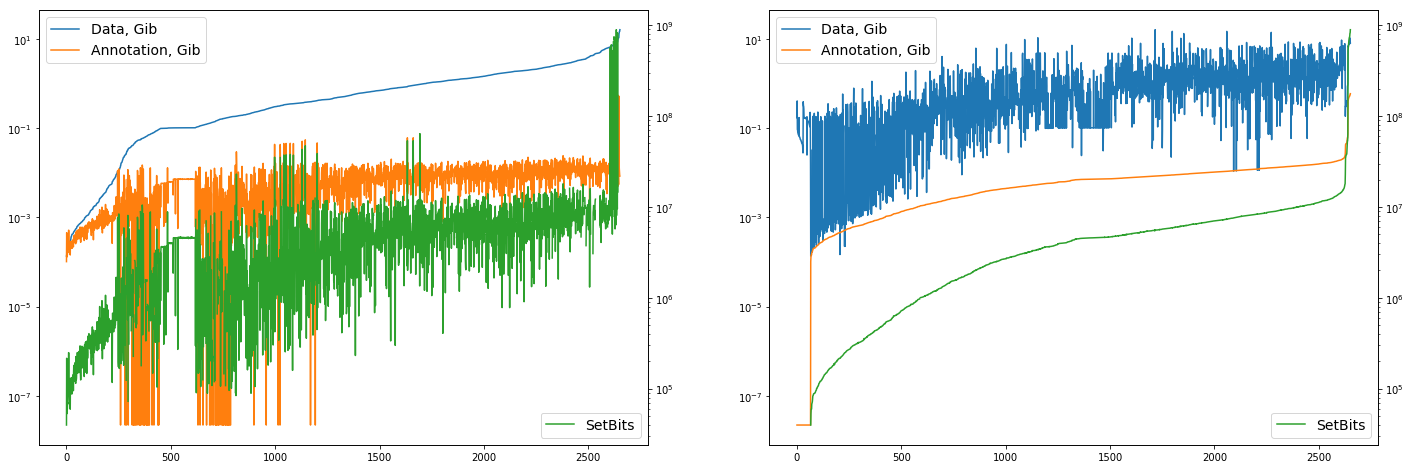

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(24, 8))

stats.sort_values('ComprData', inplace=True)
ax = axes[0]
ax.plot(stats['ComprData'].values, label='Data, Gib')
ax.plot(stats['Annotation'].values, label='Annotation, Gib')
ax.legend(loc='upper left', fontsize=14)
ax.set_yscale('log')
right_ax = ax.twinx()
right_ax._get_lines.prop_cycler = ax._get_lines.prop_cycler
right_ax.plot(stats['SetBits'].values, label='SetBits')
right_ax.legend(loc='lower right', fontsize=14)
right_ax.set_yscale('log')

stats.sort_values('Annotation', inplace=True)
ax = axes[1]
ax.plot(stats['ComprData'].values, label='Data, Gib')
ax.plot(stats['Annotation'].values, label='Annotation, Gib')
ax.legend(loc='upper left', fontsize=14)
ax.set_yscale('log')
right_ax = ax.twinx()
right_ax._get_lines.prop_cycler = ax._get_lines.prop_cycler
right_ax.plot(stats['SetBits'].values, label='SetBits')
right_ax.legend(loc='lower right', fontsize=14)
right_ax.set_yscale('log')

plt.show()

In [21]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

plt.rc('font', family='serif')#, serif='Times')
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.rc('axes', labelsize=12)
plt.rc('legend', fontsize=10)
#plt.rcParams['mathtext.fontset'] = 'stix'
#plt.rcParams['font.family'] = 'STIXGeneral'
params = {
#'text.usetex': True,
#'font.size': 15,
#'text.latex.unicode': True
}
plt.rcParams.update(params)

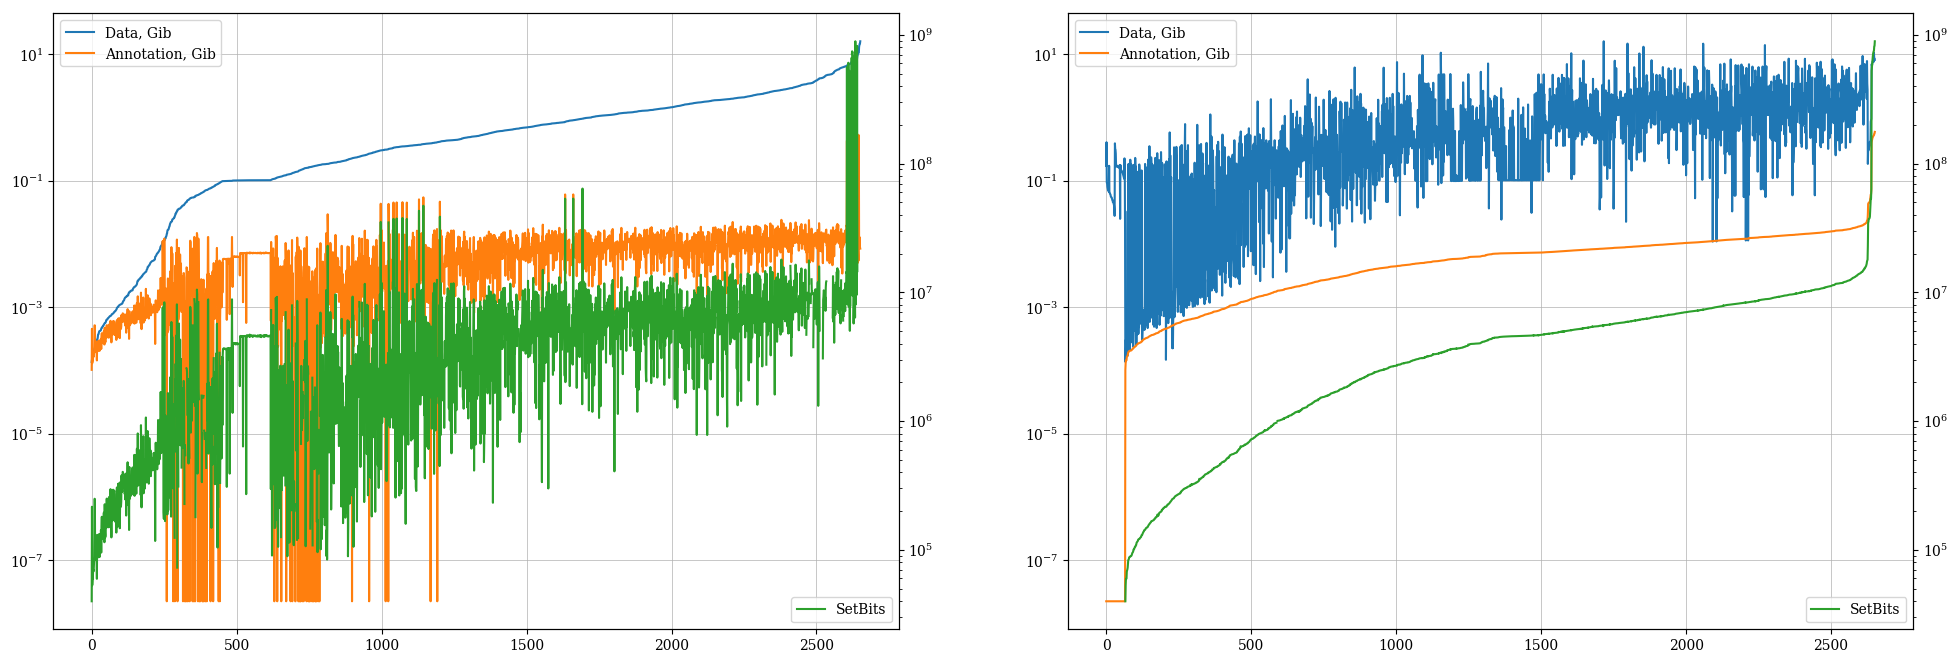

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(24, 8))

stats.sort_values('ComprData', inplace=True)
ax = axes[0]
ax.plot(stats['ComprData'].values, label='Data, Gib')
ax.plot(stats['Annotation'].values, label='Annotation, Gib')
ax.legend(loc='upper left')
ax.set_yscale('log')
right_ax = ax.twinx()
right_ax._get_lines.prop_cycler = ax._get_lines.prop_cycler
right_ax.plot(stats['SetBits'].values, label='SetBits')
right_ax.legend(loc='lower right')
right_ax.set_yscale('log')
ax.grid(linewidth=0.5)
#ax.tick_params(reset=True, direction='in', which='both', bottom=True, top=True, left=True, right=True, width=0.5)
#right_ax.tick_params(reset=True, direction='in', which='both', bottom=True, top=True, left=True, right=True, width=0.5)
#lg = ax.legend(frameon=False, loc=(0.03, 0.05))
#lg.get_frame().set_linewidth(0.5)

stats.sort_values('Annotation', inplace=True)
ax = axes[1]
ax.plot(stats['ComprData'].values, label='Data, Gib')
ax.plot(stats['Annotation'].values, label='Annotation, Gib')
ax.legend(loc='upper left')
ax.set_yscale('log')
right_ax = ax.twinx()
right_ax._get_lines.prop_cycler = ax._get_lines.prop_cycler
right_ax.plot(stats['SetBits'].values, label='SetBits')
right_ax.legend(loc='lower right')
right_ax.set_yscale('log')
ax.grid(linewidth=0.5)

plt.show()

# Simulation

In [23]:
stats['Density'].values

array([     nan,      nan,      nan, ..., 0.122585, 0.123583, 0.134296])

In [24]:
stats.sort_values('Density', inplace=True)
stats = stats.loc[stats['Density'] >= 0]

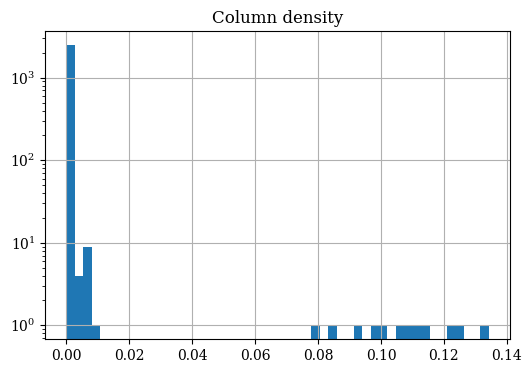

In [25]:
plt.subplots(1, 1, figsize=(6, 4))
plt.hist(stats['Density'], bins=50)
plt.title('Column density')
plt.yscale('log')
plt.grid()
plt.show()

In [26]:
num_rows = 10000

cols = np.random.random((num_rows, stats.shape[0])) <= stats['Density'].values

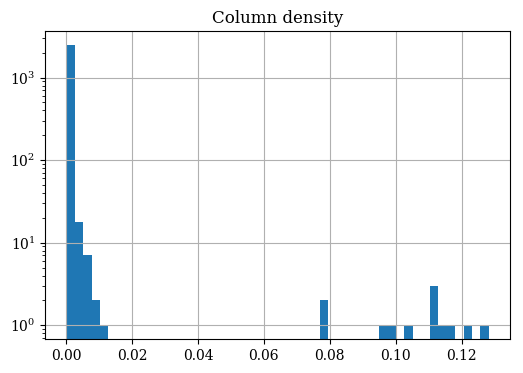

In [27]:
densities = cols.mean(0)

plt.subplots(1, 1, figsize=(6, 4))
plt.hist(densities, bins=50)
plt.title('Column density')
plt.yscale('log')
plt.grid()
plt.show()

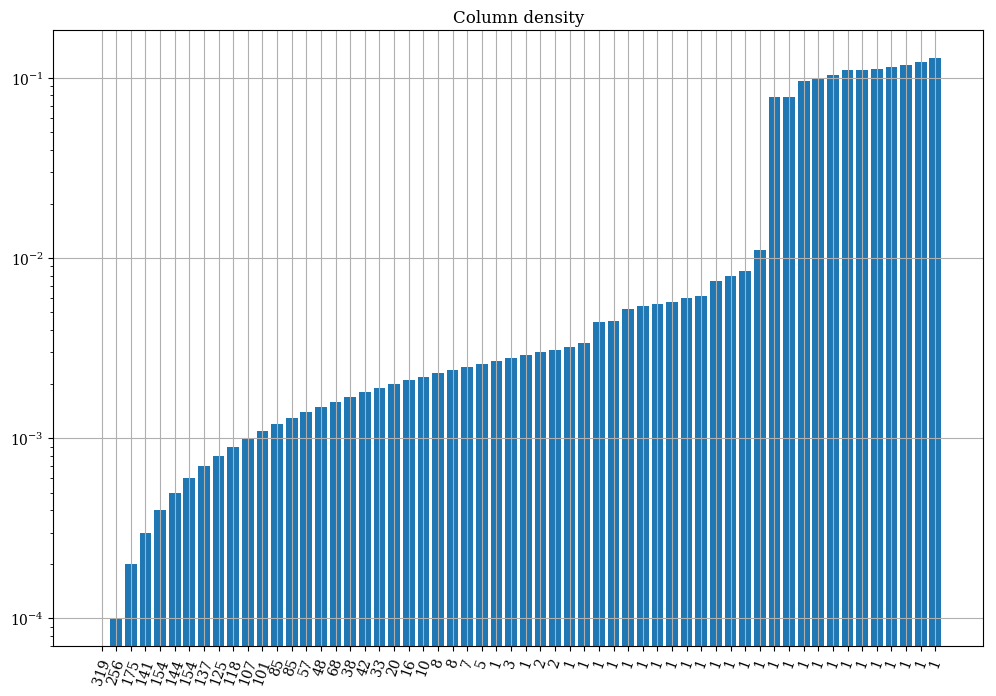

In [28]:
plt.subplots(1, 1, figsize=(12, 8))
unique_densities = np.unique(densities)
x = np.arange(len(unique_densities))
counts = [sum(densities == d) for d in unique_densities]
plt.bar(x, unique_densities)
plt.xticks(x, counts, rotation=70)
plt.title('Column density')
plt.yscale('log')
plt.grid()
plt.show()

In [29]:
cols.shape

(10000, 2496)

## Cost function

In [30]:
from itertools import groupby

def group_cost_(group_size, index_col):
    if group_size == 0:
        return 0
    elif group_size == 1:
        return 1
    else:
        return 1 + index_col.mean() * group_size

def group_cost(cols):
    return group_cost_(len(cols), np.sum(cols, 0) > 0)

def cost(cols, partition):
    d = {g: [] for g in partition}
    for c, g in zip(cols.T, partition):
        assert c.size == cols.shape[0]
        d[g].append(c)

    return sum([group_cost(cols) for cols in d.values()])

## No column index
$\{1,\dots,n\}\to\underbrace{\{1\}}_{G_1},\dots,\underbrace{\{n\}}_{G_n}$

In [31]:
grouping = np.arange(cols.shape[1])
grouping

array([   0,    1,    2, ..., 2493, 2494, 2495])

In [32]:
cost(cols, grouping)

2496

## Simple affine partitioning
$\{1,\dots,n\}\to\underbrace{\{1,\dots,s\}}_{G_1},\underbrace{\{s+1,\dots,2 s\}}_{G_2},\dots,\underbrace{\{(t-1)s+1,\dots,n\}}_{G_t}$

### Initial guess

In [33]:
grouping = np.arange(cols.shape[1]) // 28
grouping

array([ 0,  0,  0, ..., 89, 89, 89])

In [34]:
cost(cols, grouping)

155.6116

### Exhaustive search

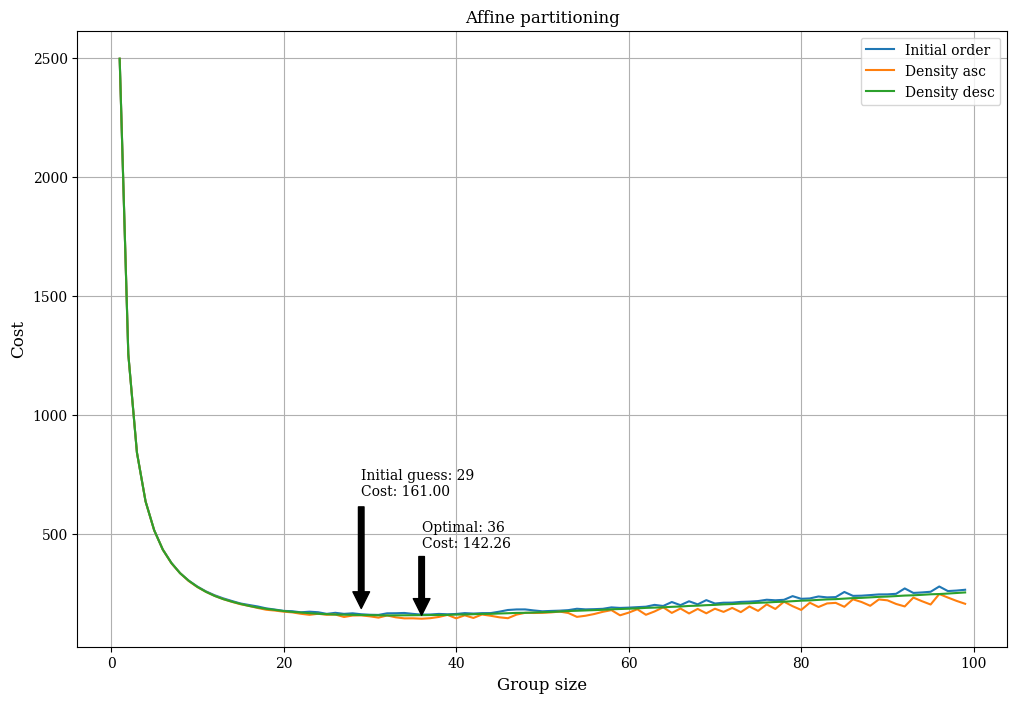

In [46]:
fig, axes = plt.subplots(1, 1, figsize=(12, 8))

group_size = np.arange(1, 100)

costs = []
for x in group_size:
    sorted_cols = cols[:, np.argsort(stats['Initial_order'].values)[::-1]]
    grouping = np.arange(sorted_cols.shape[1]) // x
    costs.append(cost(sorted_cols, grouping))
plt.plot(group_size, costs, label='Initial order')

xopt = group_size[28]
yopt = costs[28]
axes.annotate('Initial guess: {}\nCost: {:.2f}'.format(xopt, yopt), xy=(xopt, yopt), xytext=(xopt, yopt + 500), arrowprops=dict(facecolor='black', shrink=0.05))

costs = []
for x in group_size:
    sorted_cols = cols[:, np.argsort(stats['Density'].values)]
    grouping = np.arange(sorted_cols.shape[1]) // x
    costs.append(cost(sorted_cols, grouping))
plt.plot(group_size, costs, label='Density asc')

xopt = group_size[np.argmin(costs)]
yopt = costs[np.argmin(costs)]
axes.annotate('Optimal: {}\nCost: {:.2f}'.format(xopt, yopt), xy=(xopt, yopt), xytext=(xopt, yopt + 300), arrowprops=dict(facecolor='black', shrink=0.05))

costs = []
for x in group_size:
    sorted_cols = cols[:, np.argsort(stats['Density'].values)[::-1]]
    grouping = np.arange(sorted_cols.shape[1]) // x
    costs.append(cost(sorted_cols, grouping))
plt.plot(group_size, costs, label='Density desc')

plt.ylabel('Cost')
plt.xlabel('Group size')
plt.title('Affine partitioning')
plt.legend(loc='best')

plt.grid()
plt.show()

## Improve greedy

In [47]:
def greedy_improve(cols, initial_partition, num_iter=100):
    assignment = initial_partition
    num_clusters = np.unique(initial_partition).size

    index_cols = np.array([cols[:, assignment == t].sum(1) > 0 for t in range(num_clusters)]).T
    partition_sizes = [sum(assignment == t) for t in range(num_clusters)]

    total_cost = cost(cols, assignment)

    for iteration in range(num_iter):
        epoch_cost_delta = 0

        for i in np.random.choice(np.arange(cols.shape[1]), cols.shape[1], replace=False):
            old_cluster = assignment[i]

            cost_delta = -group_cost_(partition_sizes[old_cluster], index_cols[:, old_cluster])

            assignment[i] = -1
            partition_sizes[old_cluster] -= 1

            index_cols[:, old_cluster] = (cols[:, assignment == old_cluster].sum(1) > 0)

            updated_index = (index_cols + cols[:, i].reshape(-1, 1)) > 0

            cost_delta += group_cost_(partition_sizes[old_cluster], index_cols[:, old_cluster])

            cost_deltas = [cost_delta +
                               group_cost_(partition_sizes[t] + 1, updated_index[:, t]) -
                               group_cost_(partition_sizes[t], index_cols[:, t]) for t in range(index_cols.shape[1])]

            new_cluster = np.argmin(cost_deltas)

            cost_delta = cost_deltas[new_cluster]
            epoch_cost_delta += cost_delta
            total_cost += cost_delta

            assignment[i] = new_cluster
            partition_sizes[new_cluster] += 1

            index_cols[:, new_cluster] = updated_index[:, new_cluster]

            print("{}\t{}\t\t{:.5f}\t\t{:.5f}".format(i, new_cluster, cost_delta, total_cost), end='\n')

        if abs(epoch_cost_delta / total_cost) < 0.01:
            break

    return assignment

In [107]:
sorted_cols = cols[:, np.argsort(stats['Density'].values)]
partition = np.arange(sorted_cols.shape[1]) // 36

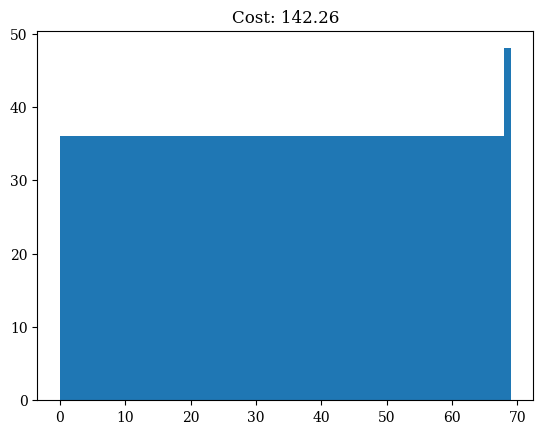

In [108]:
plt.hist(partition, bins=len(np.unique(partition)) - 1)
plt.title('Cost: {:.2f}'.format(cost(sorted_cols, partition)))
plt.show()

In [116]:
improved_partition = greedy_improve(sorted_cols, partition)

725	32		0.00000		120.95490
425	9		0.00000		120.95490
1539	37		0.00000		120.95490
384	9		0.00000		120.95490
1672	9		0.00000		120.95490
786	16		0.00000		120.95490
863	23		0.00000		120.95490
164	0		0.00000		120.95490
353	2		0.00000		120.95490
952	26		0.00000		120.95490
523	0		0.00000		120.95490
2489	68		0.00000		120.95490
1796	39		0.00000		120.95490
698	16		0.00000		120.95490
866	3		-0.00580		120.94910
1929	1		0.00000		120.94910
477	0		0.00000		120.94910
151	0		0.00000		120.94910
342	0		0.00000		120.94910
840	9		0.00000		120.94910
913	25		0.00000		120.94910
1879	26		0.00000		120.94910
1633	52		0.00000		120.94910
1002	27		0.00000		120.94910
2060	58		0.00000		120.94910
1061	46		0.00000		120.94910
1798	26		0.00000		120.94910
974	20		0.00000		120.94910
1623	17		0.00000		120.94910
2477	65		0.00000		120.94910
1314	36		0.00000		120.94910
2163	61		0.00000		120.94910
2057	39		-0.00010		120.94900
1062	1		0.00000		120.94900
1348	37		0.00000		120.94900
1436	37		0.00000		120.94900
2295	42		0.00000		12

245	0		0.00000		120.92360
234	26		0.00000		120.92360
1538	36		0.00000		120.92360
2003	47		0.00000		120.92360
2216	8		0.00000		120.92360
672	3		0.00000		120.92360
2289	48		-0.00010		120.92350
1214	33		0.00000		120.92350
1624	35		0.00000		120.92350
1440	10		0.00000		120.92350
2425	49		0.00000		120.92350
1983	1		0.00000		120.92350
494	15		0.00000		120.92350
2299	55		0.00000		120.92350
147	0		0.00000		120.92350
581	5		0.00000		120.92350
575	3		0.00000		120.92350
1984	55		0.00000		120.92350
104	0		0.00000		120.92350
2231	47		0.00000		120.92350
1354	30		0.00000		120.92350
1902	43		0.00000		120.92350
1523	39		0.00000		120.92350
1513	38		0.00000		120.92350
2041	23		0.00000		120.92350
797	16		0.00000		120.92350
77	2		0.00000		120.92350
470	5		0.00000		120.92350
359	0		0.00000		120.92350
2032	62		0.00000		120.92350
954	26		0.00000		120.92350
467	3		0.00000		120.92350
1625	46		0.00000		120.92350
2182	62		0.00000		120.92350
689	24		0.00000		120.92350
1740	48		0.00000		120.92350
670	18		0.00000		12

1765	44		0.00000		120.87650
1992	31		0.00000		120.87650
1338	33		0.00000		120.87650
1955	50		0.00000		120.87650
1713	13		0.00000		120.87650
220	0		0.00000		120.87650
848	12		0.00000		120.87650
1088	27		0.00000		120.87650
1595	44		-0.00090		120.87560
1156	41		0.00000		120.87560
1410	53		0.00000		120.87560
2382	49		0.00000		120.87560
1340	12		0.00000		120.87560
273	0		0.00000		120.87560
2061	49		-0.00040		120.87520
934	14		0.00000		120.87520
315	1		0.00000		120.87520
1086	30		0.00000		120.87520
278	7		0.00000		120.87520
1614	50		0.00000		120.87520
2308	52		0.00000		120.87520
997	31		0.00000		120.87520
973	26		0.00000		120.87520
340	3		0.00000		120.87520
1993	63		0.00000		120.87520
2090	58		0.00000		120.87520
865	3		0.00000		120.87520
178	5		0.00000		120.87520
871	12		0.00000		120.87520
1057	48		-0.00220		120.87300
1259	53		0.00000		120.87300
950	25		0.00000		120.87300
1445	4		0.00000		120.87300
634	3		0.00000		120.87300
557	0		0.00000		120.87300
1587	23		0.00000		120.87300
656	6		0.00000

1734	36		0.00000		120.86390
2214	33		0.00000		120.86390
65	0		0.00000		120.86390
328	2		0.00000		120.86390
2091	64		0.00000		120.86390
1240	40		0.00000		120.86390
759	38		0.00000		120.86390
1252	23		0.00000		120.86390
1007	27		0.00000		120.86390
218	0		0.00000		120.86390
1035	28		0.00000		120.86390
2030	60		0.00000		120.86390
1601	34		0.00000		120.86390
955	8		0.00000		120.86390
764	7		0.00000		120.86390
1837	66		0.00000		120.86390
439	3		-0.00520		120.85870
177	0		0.00000		120.85870
1612	21		0.00000		120.85870
1207	24		0.00000		120.85870
1265	45		0.00000		120.85870
1106	24		0.00000		120.85870
664	0		0.00000		120.85870
1275	16		0.00000		120.85870
2355	51		0.00000		120.85870
1241	1		0.00000		120.85870
39	0		0.00000		120.85870
1047	6		0.00000		120.85870
2411	42		0.00000		120.85870
1919	43		0.00000		120.85870
64	0		0.00000		120.85870
2142	59		0.00000		120.85870
20	0		0.00000		120.85870
2008	47		-0.00070		120.85800
461	12		0.00000		120.85800
1366	13		0.00000		120.85800
805	26		0.00000		120

1250	38		0.00000		120.84010
548	15		0.00000		120.84010
1682	28		0.00000		120.84010
216	1		0.00000		120.84010
2254	34		0.00000		120.84010
1781	33		0.00000		120.84010
1540	18		0.00000		120.84010
558	15		0.00000		120.84010
851	23		0.00000		120.84010
1235	8		0.00000		120.84010
2119	18		0.00000		120.84010
1875	58		0.00000		120.84010
1492	21		-0.00140		120.83870
1069	18		0.00000		120.83870
588	15		0.00000		120.83870
56	3		0.00000		120.83870
238	0		0.00000		120.83870
1960	54		0.00000		120.83870
18	0		0.00000		120.83870
1453	16		0.00000		120.83870
1669	14		0.00000		120.83870
2249	62		0.00000		120.83870
597	0		0.00000		120.83870
2078	52		0.00000		120.83870
524	0		0.00000		120.83870
1801	46		-0.00270		120.83600
1168	33		0.00000		120.83600
2220	63		0.00000		120.83600
2092	52		0.00000		120.83600
2207	33		-0.00020		120.83580
1776	30		0.00000		120.83580
1696	8		0.00000		120.83580
1076	28		-0.00010		120.83570
1172	17		0.00000		120.83570
440	0		0.00000		120.83570
930	16		0.00000		120.83570
2361	62		0.

501	6		0.00000		120.80070
2303	1		0.00000		120.80070
2305	64		0.00000		120.80070
2133	56		0.00000		120.80070
2474	65		0.00000		120.80070
15	5		-0.00030		120.80040
610	8		0.00000		120.80040
248	2		0.00000		120.80040
1617	45		0.00000		120.80040
361	2		0.00000		120.80040
2044	54		-0.00020		120.80020
1479	34		0.00000		120.80020
274	2		0.00000		120.80020
1278	31		0.00000		120.80020
2422	52		0.00000		120.80020
1286	29		0.00000		120.80020
2065	31		0.00000		120.80020
967	5		0.00000		120.80020
2183	44		0.00000		120.80020
1913	61		-0.00030		120.79990
287	6		0.00000		120.79990
826	18		0.00000		120.79990
1358	9		0.00000		120.79990
2017	41		0.00000		120.79990
2058	50		-0.00040		120.79950
1320	5		0.00000		120.79950
2464	64		-0.00410		120.79540
380	6		0.00000		120.79540
2004	46		-0.00440		120.79100
413	5		0.00000		120.79100
2344	42		0.00000		120.79100
854	6		0.00000		120.79100
7	0		0.00000		120.79100
2444	66		0.00000		120.79100
2122	13		0.00000		120.79100
96	0		0.00000		120.79100
415	0		0.00000		120.

1166	19		0.00000		120.74430
2275	33		0.00000		120.74430
32	0		0.00000		120.74430
2362	57		0.00000		120.74430
944	24		0.00000		120.74430
454	5		0.00000		120.74430
76	0		0.00000		120.74430
576	2		-0.00040		120.74390
242	0		0.00000		120.74390
1844	22		-0.00050		120.74340
17	0		0.00000		120.74340
1264	39		0.00000		120.74340
182	0		0.00000		120.74340
2459	49		0.00000		120.74340
1758	23		0.00000		120.74340
2263	51		0.00000		120.74340
1364	23		0.00000		120.74340
2055	64		0.00000		120.74340
1887	52		0.00000		120.74340
488	8		0.00000		120.74340
756	21		0.00000		120.74340
1373	13		0.00000		120.74340
1603	25		0.00000		120.74340
1114	56		0.00000		120.74340
240	3		-0.00030		120.74310
1001	12		0.00000		120.74310
1342	19		0.00000		120.74310
230	5		0.00000		120.74310
963	28		0.00000		120.74310
1547	33		0.00000		120.74310
1616	26		0.00000		120.74310
462	12		0.00000		120.74310
1780	29		-0.00130		120.74180
2292	28		0.00000		120.74180
2283	46		0.00000		120.74180
1124	35		0.00000		120.74180
1916	52		0.0000

1608	43		0.00000		120.70640
755	26		0.00000		120.70640
229	0		0.00000		120.70640
635	7		0.00000		120.70640
925	25		0.00000		120.70640
493	16		0.00000		120.70640
1898	52		-0.00060		120.70580
2087	57		0.00000		120.70580
2012	27		0.00000		120.70580
276	15		0.00000		120.70580
350	9		0.00000		120.70580
2428	64		0.00000		120.70580
329	0		0.00000		120.70580
602	2		0.00000		120.70580
705	19		0.00000		120.70580
1988	51		0.00000		120.70580
1702	47		0.00000		120.70580
2338	53		0.00000		120.70580
73	0		0.00000		120.70580
2175	42		0.00000		120.70580
1020	22		0.00000		120.70580
1281	35		-0.00230		120.70350
896	2		0.00000		120.70350
1532	42		0.00000		120.70350
2138	50		0.00000		120.70350
1999	13		0.00000		120.70350
2250	59		-0.00480		120.69870
2347	51		-0.00090		120.69780
2123	43		0.00000		120.69780
1529	32		0.00000		120.69780
1557	57		0.00000		120.69780
1511	34		0.00000		120.69780
2081	54		0.00000		120.69780
1298	35		0.00000		120.69780
2255	28		-0.00130		120.69650
1246	54		0.00000		120.69650
1720	43

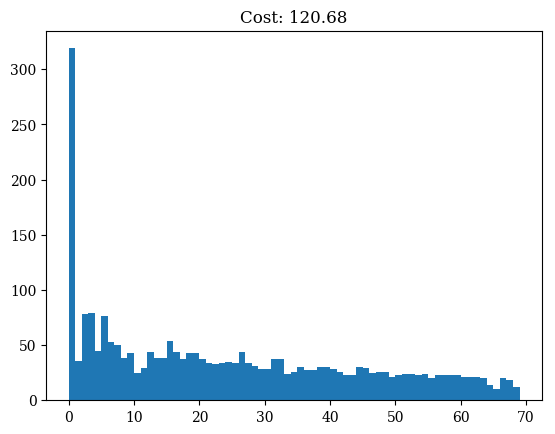

In [117]:
plt.hist(improved_partition, bins=len(np.unique(improved_partition)) - 1)
plt.title('Cost: {:.2f}'.format(cost(sorted_cols, improved_partition)))
plt.show()

In [118]:
def sa_improve(cols, initial_partition, num_iter=100, k=1):
    assignment = initial_partition.copy()
    num_clusters = np.unique(initial_partition).size

    index_cols = np.array([cols[:, assignment == t].sum(1) > 0 for t in range(num_clusters)]).T
    partition_sizes = [sum(assignment == t) for t in range(num_clusters)]

    total_cost = cost(cols, assignment)

    for iteration in range(num_iter):
        i = np.random.randint(0, cols.shape[1])

        old_cluster = assignment[i]
        new_cluster = np.random.randint(0, num_clusters)

        if old_cluster == new_cluster:
            continue

        assignment[i] = -1

        cost_delta = (group_cost_(partition_sizes[new_cluster] + 1, index_cols[:, new_cluster] + cols[:, i] > 0)
                        - group_cost_(partition_sizes[new_cluster], index_cols[:, new_cluster])
                        + group_cost_(partition_sizes[old_cluster] - 1, cols[:, assignment == old_cluster].sum(1) > 0)
                        - group_cost_(partition_sizes[old_cluster], index_cols[:, old_cluster]))

        T = (num_iter - iteration) / num_iter
        if iteration % 100 == 0:
            print(cost_delta, np.exp(-cost_delta / (k * T)))
        if np.exp(-cost_delta / (k * T)) < np.random.random():
            assignment[i] = old_cluster
            continue

        assignment[i] = new_cluster

        partition_sizes[new_cluster] += 1
        partition_sizes[old_cluster] -= 1

        index_cols[:, old_cluster] = cols[:, assignment == old_cluster].sum(1) > 0
        index_cols[:, new_cluster] = index_cols[:, new_cluster] + cols[:, i] > 0

        total_cost += cost_delta

        if iteration % 100 == 0:
            print("{}\t{}\t{}->{}\t\t{:.5f}\t\t{:.5f}".format(iteration, i, old_cluster, new_cluster, cost_delta, total_cost), end='\n')

    return assignment

In [119]:
improved_partition = sa_improve(sorted_cols, improved_partition, num_iter=int(5e4), k=5e-3)

0.040300000000000225 0.00031592680530154123
0.006300000000000194 0.28293868938282846
0.0239999999999998 0.008072620659737052
0.005199999999999871 0.351242761633387
0.023600000000000287 0.008582204050492601
0.009399999999999853 0.1497197749644274
0.04019999999999979 0.00029232281899340675
0.009200000000000097 0.15472193194315298
0.0041999999999997595 0.42585407574882767
800	1317	44->19		0.00420		121.42740
0.013699999999999823 0.06140745510284813
0.0121 0.08463666150622445
0.01330000000000009 0.06588553236394748
0.028400000000000203 0.0029685782895974102
0.013499999999999845 0.06253218330006001
0.013100000000000112 0.06751042483498389
0.016899999999999915 0.0306679825441253
2.2581000000000007 2.3993241677604787e-203
0.011900000000000022 0.08511362793798641
0.0015000000000000568 0.7325649159926559
1800	730	9->6		0.00150		122.15600
0.0036999999999995925 0.4633693692312146
1900	1727	25->66		0.00370		122.20370
0.010900000000000132 0.10322612246201707
0.008999999999999897 0.15275584675867668


0.0046000000000001595 0.2470470951777356
0.007000000000000339 0.11834557397722711
0.019700000000000273 0.0024188457103358593
-0.0007999999999999119 1.2781308956937385
17400	2223	34->46		-0.00080		126.65670
0.0031999999999998696 0.3735828850333608
0.0012999999999998568 0.6694930010499209
17600	1831	38->17		0.00130		126.65480
-0.0041999999999999815 3.6704328486498174
17700	1977	49->35		-0.00420		126.64520
0.005199999999999871 0.1989092014907489
0.0029999999999998916 0.39275100646012384
0.001300000000000301 0.6661436107034251
18000	993	44->12		0.00130		126.59520
0.010199999999999987 0.04086455723031348
0.0040999999999999925 0.2754612878865805
18200	1320	5->4		0.00410		126.59160
0.011600000000000277 0.025750377450938774
0.0039000000000000146 0.29107415526349717
18400	1000	28->49		0.00390		126.59110
0.008800000000000141 0.061197386559559544
0.0029999999999998916 0.38465286039819113
18600	2318	59->42		0.00300		126.61170
0.07719999999999949 1.942351362597436e-11
0.45819999999999994 1.65942572

0.006799999999999917 0.01704571737040593
0.0048000000000001375 0.05548923366530807
0.005099999999999882 0.045460607788293785
0.0040000000000000036 0.0872459279329867
0.06129999999999991 4.6486860868745715e-17
0.007599999999999829 0.009174218876966298
0.009100000000000108 0.003509878305007158
0.01079999999999992 0.0011708796207912325
0.013799999999999812 0.0001700793809697754
0.008200000000000207 0.005572712176879832
0.44869999999999965 7.590961629658556e-125
0.021099999999999897 1.3362531388097663e-06
0.4704000000000006 1.579899610673216e-132
0.005600000000000049 0.02634798081444788
0.009099999999999886 0.0026118084149129206
-0.0032999999999998586 8.767508141036604
34800	2340	39->50		-0.00330		125.85610
0.0 1.0
34900	1741	32->37		0.00000		125.83960
0.012499999999999956 0.00024036947641952134
0.020199999999999996 1.2949389848538088e-06
0.4634000000000005 1.0444229574582913e-136
-0.0016000000000000458 2.9696240851570974
35300	1194	19->14		-0.00160		125.83420
0.0049000000000001265 0.03486

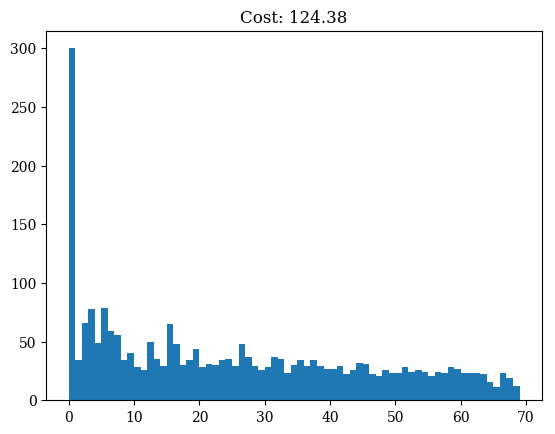

In [120]:
plt.hist(improved_partition, bins=len(np.unique(improved_partition)) - 1)
plt.title('Cost: {:.2f}'.format(cost(sorted_cols, improved_partition)))
plt.show()

In [121]:
sorted_cols = cols[:, np.argsort(stats['Density'].values)]
partition = np.arange(sorted_cols.shape[1]) // 36

In [122]:
improved_partition = sa_improve(sorted_cols, partition, num_iter=int(1e5), k=1e-3)

0.029199999999999893 2.0825772910557237e-13
-0.04479999999999995 2.9913598338888225e+19
100	2049	56->13		-0.04480		141.00750
0.029499999999999638 1.454246609625526e-13
0.007800000000000029 0.0004002303061247254
0.030700000000000394 4.1078432300412645e-14
-0.0025999999999999357 13.640800339810017
500	1413	39->26		-0.00260		138.43760
-0.00019999999999997797 1.2228781790698195
600	509	14->23		-0.00020		138.02730
0.006699999999999928 0.001174126732246087
0.023800000000000043 3.8057022689872394e-11
-0.0044999999999999485 93.77214124936795
900	1833	28->22		-0.00450		137.22980
0.028799999999999937 2.3226229246026036e-13
0.005899999999999794 0.002565448811960911
0.012700000000000378 2.614988097334871e-06
0.0008999999999999009 0.40177859397526633
0.010999999999999677 1.4286627292827843e-05
0.005599999999999827 0.0033955851112888774
0.004799999999999693 0.0076118519408903094
0.0029000000000003467 0.05233171982743939
0.012600000000000389 2.6766160474459546e-06
0.014399999999999968 4.2173061384288

0.0023999999999999577 0.055682651564597306
0.006900000000000128 0.00024524495954392607
0.004200000000000204 0.006305424439120651
0.009599999999999831 9.219378794341298e-06
0.008600000000000163 3.0461936171363133e-05
0.0025999999999999357 0.04295081058937098
0.019099999999999895 8.819109237338512e-11
0.6972999999999994 0.0
0.030400000000000205 9.078554547717371e-17
0.009199999999999875 1.378107736880836e-05
0.019500000000000295 4.8399940405594184e-11
0.0017000000000000348 0.1257863140829682
18000	1716	57->55		0.00170		130.30470
0.01089999999999991 1.659634253791329e-06
0.0039000000000000146 0.008499685115824187
0.0036000000000000476 0.012199445866147483
0.0038000000000000256 0.009496207742244675
0.006500000000000172 0.000343796679704249
0.0052000000000000934 0.0016812690426306553
0.010699999999999932 1.923947272357219e-06
0.006199999999999983 0.00048301252146210635
0.02089999999999992 6.426098582375341e-12
0.014500000000000401 1.6810963604119524e-08
0.0016000000000000458 0.1383802000821

0.0039000000000000146 0.0023661014693135856
0.010499999999999954 8.30064247028659e-08
0.0050000000000001155 0.00041966668591650444
0.009600000000000053 3.2053606871111837e-07
0.008199999999999985 2.7815236622184236e-06
0.016699999999999937 4.651878497265168e-12
0.007500000000000062 7.991842676950478e-06
0.025000000000000133 9.598229897889767e-18
0.019500000000000073 5.0730712526765296e-14
0.022399999999999975 5.059338288586671e-16
0.005400000000000071 0.0002026688872553618
0.015899999999999803 1.2834755473675788e-11
0.007799999999999807 4.451475776856524e-06
0.026000000000000245 1.3597368216964395e-18
0.008500000000000396 1.4117486311532794e-06
0.006699999999999928 2.4060943471180935e-05
0.009400000000000075 3.2340639335021954e-07
0.0049000000000003485 0.0004086923968990895
0.022299999999999986 3.57932161749777e-16
0.015000000000000346 3.9226783815315845e-11
0.008399999999999963 1.4557344617411435e-06
0.011800000000000033 6.1288640736874454e-09
0.006000000000000005 6.567326638742795e-0

0.12740000000000018 1.5633913244770787e-121
0.0033999999999996255 0.0005873880135821952
0.010399999999999965 1.2446238877473107e-10
0.02389999999999981 1.540311411728596e-23
-0.000400000000000178 2.4134500232182825
54600	1194	37->22		-0.00040		127.44290
0.014699999999999935 8.072355063056761e-15
0.007300000000000084 9.68170736169869e-08
0.01059999999999972 6.2034778639912e-11
0.024900000000000144 9.311907816576854e-25
0.02089999999999992 6.088506209224782e-21
0.01440000000000019 1.0978285233282728e-14
0.006799999999999917 2.4733356044517106e-07
0.00509999999999966 1.0810663190477518e-05
0.014899999999999913 2.873786009462315e-15
-0.0017000000000000348 46.00862269569214
55600	442	4->1		-0.00170		127.37970
0.007600000000000273 3.5428253712277975e-08
0.022299999999999986 1.2267683548914692e-22
0.0014000000000000679 0.0418106923379543
0.009200000000000097 8.304188456650241e-10
0.0043000000000001926 5.573018646754359e-05
0.012900000000000134 1.6185835491548402e-13
0.006199999999999983 6.892

0.019200000000000328 5.886199929898981e-32
0.0045000000000001705 4.496896584041911e-08
0.009200000000000097 8.367710878095828e-16
0.014599999999999946 9.598405796517283e-25
0.010699999999999932 2.1428163763699604e-18
0.0035000000000000586 1.578905573470228e-06
0.018599999999999728 1.1227376876977427e-31
0.026100000000000012 2.5323018395822743e-44
0.011400000000000299 7.661883524366459e-20
0.020299999999999985 6.74167029287237e-35
0.015200000000000102 2.0611076783998612e-26
0.007600000000000051 1.2790354113007542e-13
0.028299999999999992 6.3361884692354975e-49
0.01749999999999985 1.1971155974421417e-30
0.012799999999999923 1.0660781882445886e-22
0.006000000000000227 4.567254294017419e-11
0.02210000000000001 5.771949327349008e-39
0.7154999999999996 0.0
0.06260000000000021 6.545237849768682e-110
0.005199999999999871 7.831147057288868e-10
0.02279999999999971 8.152270725439654e-41
0.0024999999999999467 3.70189123004876e-05
0.0037000000000000366 2.596491796180171e-07
0.011499999999999844 2.7

-0.0018000000000000238 465171337213.1113
93300	1793	14->40		-0.00180		126.13770
0.0030999999999996586 3.993188294762096e-21
0.0020999999999997687 9.309953412252448e-15
0.0034000000000000696 8.474335404605568e-24
0.006899999999999906 2.7190292953593886e-48
0.02949999999999986 2.290253790259973e-207
0.012199999999999767 1.383896526742008e-87
2.2485 0.0
0.00869999999999993 9.119399211370376e-65
0.009899999999999798 7.420354276089176e-75
0.008499999999999952 1.7249947846198311e-65
0.027900000000000036 4.248982172460899e-217
0.005300000000000082 1.411901732513514e-42
0.023299999999999876 4.0735546693147054e-188
0.008000000000000007 2.79328943746703e-66
0.0046999999999999265 5.577765985176515e-40
0.0034999999999996145 1.568471862598643e-30
0.017099999999999893 2.9599691799862865e-149
0.0043999999999997375 1.0049122853327628e-39
0.00649999999999995 1.546282742590122e-59
0.010700000000000154 1.3449404518042061e-99
0.011700000000000044 3.452571222634336e-111
0.005599999999999827 9.0046010117331

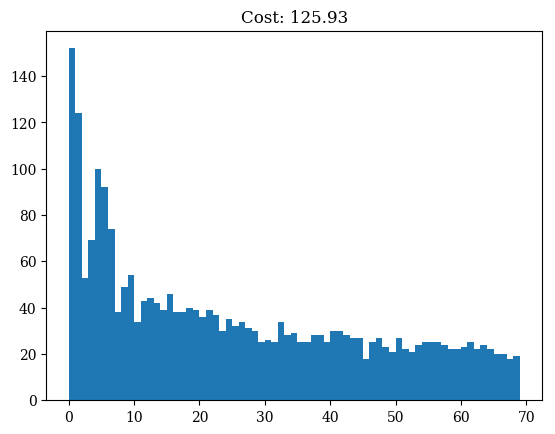

In [123]:
plt.hist(improved_partition, bins=len(np.unique(improved_partition)) - 1)
plt.title('Cost: {:.2f}'.format(cost(sorted_cols, improved_partition)))
plt.show()

## Clustering

### Agglomerative clustering

def find_clusters(input):
    clusters = {}

    array = [n for n in range(input.shape[0])]

    clusters[0] = array.copy()

    for k in range(1, input.shape[0]):
        min_val = sys.maxsize

        for i in range(0, input.shape[0]):
            for j in range(0, input.shape[1]):
                if(input[i][j] <= min_val):
                    min_val = input[i][j]
                    row_index = i
                    col_index = j

        for i in range(0, input.shape[0]):
            if(i != col_index and i != row_index):
                dist_centroid = cal_dist_from_centroid(i, row_index, col_index)
                input[col_index][i] = dist_centroid
                input[i][col_index] = dist_centroid

        #set the rows and columns for the cluster with higher index i.e. the row index to infinity
        for i in range (0, input.shape[0]):
            input[row_index][i] = sys.maxsize
            input[i][row_index] = sys.maxsize

        #Manipulating the dictionary to keep track of cluster formation in each step
        #if k=0,then all datapoints are clusters

        minimum = min(row_index, col_index)
        maximum = max(row_index, col_index)

        for n in range(len(array)):
            if(array[n]==maximum):
                array[n] = minimum
        clusters[k] = array.copy()

    return clusters

import sys
import math
import os
import heapq
import itertools

class Hierarchical_Clustering:
    def __init__(self, ipt_data, ipt_k):
        self.input_file_name = ipt_data
        self.k = ipt_k
        self.dataset = None
        self.dataset_size = 0
        self.dimension = 0
        self.heap = []
        self.clusters = []
        self.gold_standard = {}

    def initialize(self):
        """
        Initialize and check parameters
        """
        # check file exist and if it's a file or dir
        if not os.path.isfile(self.input_file_name):
            self.quit("Input file doesn't exist or it's not a file")

        self.dataset, self.clusters, self.gold_standard = self.load_data(self.input_file_name)
        self.dataset_size = len(self.dataset)

        if self.dataset_size == 0:
            self.quit("Input file doesn't include any data")

        if self.k == 0:
            self.quit("k = 0, no cluster will be generated")

        if self.k > self.dataset_size:
            self.quit("k is larger than the number of existing clusters")

        self.dimension = len(self.dataset[0]["data"])

        if self.dimension == 0:
            self.quit("dimension for dataset cannot be zero")

    """"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
    """                      Hierarchical Clustering Functions                       """
    """                                                                              """    
    """"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""

    def euclidean_distance(self, data_point_one, data_point_two):
        """
        euclidean distance: https://en.wikipedia.org/wiki/Euclidean_distance
        assume that two data points have same dimension
        """
        size = len(data_point_one)
        result = 0.0
        for i in range(size):
            f1 = float(data_point_one[i])   # feature for data one
            f2 = float(data_point_two[i])   # feature for data two
            tmp = f1 - f2
            result += pow(tmp, 2)
        result = math.sqrt(result)
        return result

    def compute_pairwise_distance(self, dataset):
        result = []
        dataset_size = len(dataset)
        for i in range(dataset_size-1):    # ignore last i
            for j in range(i+1, dataset_size):     # ignore duplication
                dist = self.euclidean_distance(dataset[i]["data"], dataset[j]["data"])

                # duplicate dist, need to be remove, and there is no difference to use tuple only
                # leave second dist here is to take up a position for tie selection
                result.append( (dist, [dist, [[i], [j]]]) )

        return result
                
    def build_priority_queue(self, distance_list):
        heapq.heapify(distance_list)
        self.heap = distance_list
        return self.heap

    def compute_centroid_two_clusters(self, current_clusters, data_points_index):
        size = len(data_points_index)
        dim = self.dimension
        centroid = [0.0]*dim
        for index in data_points_index:
            dim_data = current_clusters[str(index)]["centroid"]
            for i in range(dim):
                centroid[i] += float(dim_data[i])
        for i in range(dim):
            centroid[i] /= size
        return centroid

    def compute_centroid(self, dataset, data_points_index):
        size = len(data_points_index)
        dim = self.dimension
        centroid = [0.0]*dim
        for idx in data_points_index:
            dim_data = dataset[idx]["data"]
            for i in range(dim):
                centroid[i] += float(dim_data[i])
        for i in range(dim):
            centroid[i] /= size
        return centroid

    def hierarchical_clustering(self):
        """
        Main Process for hierarchical clustering
        """
        dataset = self.dataset
        current_clusters = self.clusters
        old_clusters = []
        heap = hc.compute_pairwise_distance(dataset)
        heap = hc.build_priority_queue(heap)

        while len(current_clusters) > self.k:
            dist, min_item = heapq.heappop(heap)
            # pair_dist = min_item[0]
            pair_data = min_item[1]

            # judge if include old cluster
            if not self.valid_heap_node(min_item, old_clusters):
                continue

            new_cluster = {}
            new_cluster_elements = sum(pair_data, [])
            new_cluster_cendroid = self.compute_centroid(dataset, new_cluster_elements)
            new_cluster_elements.sort()
            new_cluster.setdefault("centroid", new_cluster_cendroid)
            new_cluster.setdefault("elements", new_cluster_elements)
            for pair_item in pair_data:
                old_clusters.append(pair_item)
                del current_clusters[str(pair_item)]
            self.add_heap_entry(heap, new_cluster, current_clusters)
            current_clusters[str(new_cluster_elements)] = new_cluster
        current_clusters.sort()
        return current_clusters
            
    def valid_heap_node(self, heap_node, old_clusters):
        pair_dist = heap_node[0]
        pair_data = heap_node[1]
        for old_cluster in old_clusters:
            if old_cluster in pair_data:
                return False
        return True
            
    def add_heap_entry(self, heap, new_cluster, current_clusters):
        for ex_cluster in current_clusters.values():
            new_heap_entry = []
            dist = self.euclidean_distance(ex_cluster["centroid"], new_cluster["centroid"])
            new_heap_entry.append(dist)
            new_heap_entry.append([new_cluster["elements"], ex_cluster["elements"]])
            heapq.heappush(heap, (dist, new_heap_entry))

    def evaluate(self, current_clusters):
        gold_standard = self.gold_standard
        current_clustes_pairs = []

        for (current_cluster_key, current_cluster_value) in current_clusters.items():
            tmp = list(itertools.combinations(current_cluster_value["elements"], 2))
            current_clustes_pairs.extend(tmp)
        tp_fp = len(current_clustes_pairs)

        gold_standard_pairs = []
        for (gold_standard_key, gold_standard_value) in gold_standard.items():
            tmp = list(itertools.combinations(gold_standard_value, 2))
            gold_standard_pairs.extend(tmp)
        tp_fn = len(gold_standard_pairs)

        tp = 0.0
        for ccp in current_clustes_pairs:
            if ccp in gold_standard_pairs:
                tp += 1

        if tp_fp == 0:
            precision = 0.0
        else:
            precision = tp/tp_fp
        if tp_fn == 0:
            precision = 0.0
        else:
            recall = tp/tp_fn

        return precision, recall

    """"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
    """                             Helper Functions                                 """
    """                                                                              """    
    """"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
    def load_data(self, input_file_name):
        """
        load data and do some preparations
        """
        input_file = open(input_file_name, 'rU')
        dataset = []
        clusters = {}
        gold_standard = {}
        id = 0
        for line in input_file:
            line = line.strip('\n')
            row = str(line)
            row = row.split(",")
            iris_class = row[-1]

            data = {}
            data.setdefault("id", id)   # duplicate
            data.setdefault("data", row[:-1])
            data.setdefault("class", row[-1])
            dataset.append(data)

            clusters_key = str([id])
            clusters.setdefault(clusters_key, {})
            clusters[clusters_key].setdefault("centroid", row[:-1])
            clusters[clusters_key].setdefault("elements", [id])

            gold_standard.setdefault(iris_class, [])
            gold_standard[iris_class].append(id)

            id += 1
        return dataset, clusters, gold_standard

    def quit(self, err_desc):
        raise SystemExit('\n'+ "PROGRAM EXIT: " + err_desc + ', please check your input' + '\n')

    def loaded_dataset(self):
        """
        use for test only
        """
        return self.dataset

    def display(self, current_clusters, precision, recall):
        print precision
        print recall
        clusters = current_clusters.values()
        for cluster in clusters:
            cluster["elements"].sort()
            print cluster["elements"]
